# IMPORTING LIBRARIES

In [0]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

<!-- # Inserting Extra Features  -->

# DATA PREPERATION

## BRENT OIL FUTURES 

### Brent Oil Futures Historical Data

In [0]:
brent_oil = pd.read_csv('Brent Oil Futures Historical Data.csv') 

In [0]:
brent_oil.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 29, 2017",66.87,66.15,66.98,66.15,157.95K,0.22%
1,"Dec 28, 2017",66.72,66.43,66.85,66.23,35.09K,0.42%
2,"Dec 27, 2017",66.44,66.76,66.94,66.03,122.43K,-0.87%
3,"Dec 26, 2017",67.02,65.20,67.10,65.00,74.25K,2.71%
4,"Dec 22, 2017",65.25,64.63,65.28,64.38,110.42K,0.54%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [0]:
brent_oil[brent_oil.isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Vol.,Change %


In [0]:
import numpy as np
np.sum(brent_oil.isnull().any(axis=1))

0

In [0]:
brent_oil.isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [0]:
brent_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 7 columns):
Date        1548 non-null object
Price       1548 non-null float64
Open        1548 non-null float64
High        1548 non-null float64
Low         1548 non-null float64
Vol.        1548 non-null object
Change %    1548 non-null object
dtypes: float64(4), object(3)
memory usage: 84.7+ KB


In [0]:
brent_oil.describe()

,Price,Open,High,Low
count,1548.000000,1548.000000,1548.000000,1548.000000
mean,78.919231,78.931654,79.784367,78.013714
std,29.378784,29.342472,29.370363,29.297804
min,27.880000,27.990000,28.750000,27.100000
25%,50.800000,50.882500,51.547500,50.060000
50%,66.230000,66.075000,66.905000,65.050000
75%,108.767500,108.682500,109.460000,107.792500
max,126.220000,126.160000,128.400000,125.000000


In [0]:
brent_oil=brent_oil.rename(columns={'Change %':'Change_oil'})
brent_oil=brent_oil[['Date','Change_oil']]

In [0]:

brent_oil.head()

,Date,Change_oil
0,"Dec 29, 2017",0.22%
1,"Dec 28, 2017",0.42%
2,"Dec 27, 2017",-0.87%
3,"Dec 26, 2017",2.71%
4,"Dec 22, 2017",0.54%


## DAX

### DAX Historical Data

In [0]:
DAX= pd.read_csv('DAX Historical Data.csv') 

In [0]:
DAX.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 29, 2017","12,917.64","12,980.09","12,980.74","12,911.73",43.47M,-0.48%
1,"Dec 28, 2017","12,979.94","13,065.46","13,069.40","12,965.28",44.49M,-0.69%
2,"Dec 27, 2017","13,070.02","13,070.19","13,128.74","13,020.43",46.06M,-0.02%
3,"Dec 22, 2017","13,072.79","13,076.76","13,108.56","13,059.87",54.51M,-0.28%
4,"Dec 21, 2017","13,109.74","13,065.79","13,137.71","13,013.63",72.54M,0.31%


<br>
<hr size=6 color='black'>
<br>


### Dataset analysis

In [0]:
DAX[DAX.isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Vol.,Change %


In [0]:
import numpy as np
np.sum(DAX.isnull().any(axis=1))

0

In [0]:
DAX.isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [0]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 7 columns):
Date        1520 non-null object
Price       1520 non-null object
Open        1520 non-null object
High        1520 non-null object
Low         1520 non-null object
Vol.        1520 non-null object
Change %    1520 non-null object
dtypes: object(7)
memory usage: 83.2+ KB


In [0]:
DAX.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1520,1520,1520,1520,1520,1520,1520
unique,1520,1517,1519,1516,1518,1406,471
top,"Jun 11, 2012","9,339.17","11,881.49","11,881.81","9,805.55",82.31M,0.19%
freq,1,2,2,2,2,4,17


### Getting change feature

In [0]:
DAX=DAX.rename(columns={'Change %':'Change_DAX'})
DAX=DAX[['Date','Change_DAX']]

In [0]:
DAX.head()

,Date,Change_DAX
0,"Dec 29, 2017",-0.48%
1,"Dec 28, 2017",-0.69%
2,"Dec 27, 2017",-0.02%
3,"Dec 22, 2017",-0.28%
4,"Dec 21, 2017",0.31%


### Merging The data for change feature

In [0]:
aa=display('change_feature', 'DAX', "pd.merge(brent_oil, brent_oil, on='Date')")

'change_feature'

'DAX'

"pd.merge(brent_oil, brent_oil, on='Date')"

In [0]:
change_feature =pd.merge(brent_oil, DAX, on='Date')

In [0]:
change_feature.head()

,Date,Change_oil,Change_DAX
0,"Dec 29, 2017",0.22%,-0.48%
1,"Dec 28, 2017",0.42%,-0.69%
2,"Dec 27, 2017",-0.87%,-0.02%
3,"Dec 22, 2017",0.54%,-0.28%
4,"Dec 21, 2017",0.53%,0.31%


## GOLD FUTURES

### Gold Futures Historical Data

In [0]:
gold_features = pd.read_csv('Gold Futures Historical Data.csv') 

In [0]:
gold_features.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 01, 2018","1,308.70","1,305.80","1,309.70","1,304.60",-,-2.87%
1,"Dec 29, 2017","1,347.40","1,347.50","1,347.50","1,347.50",0.02K,4.12%
2,"Dec 28, 2017","1,294.10","1,288.20","1,293.70","1,288.20",0.25K,-2.58%
3,"Dec 27, 2017","1,328.40","1,328.30","1,328.30","1,328.30",0.00K,0.29%
4,"Dec 26, 2017","1,324.60","1,320.50","1,324.10","1,320.50",0.01K,3.65%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [0]:
gold_features[gold_features.isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Vol.,Change %


In [0]:
import numpy as np
np.sum(gold_features.isnull().any(axis=1))

0

In [0]:
gold_features.isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [0]:
gold_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 7 columns):
Date        1564 non-null object
Price       1564 non-null object
Open        1564 non-null object
High        1564 non-null object
Low         1564 non-null object
Vol.        1564 non-null object
Change %    1564 non-null object
dtypes: object(7)
memory usage: 85.6+ KB


In [0]:
gold_features.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1564,1564,1564,1564,1564,1564,1564
unique,1564,1280,1283,1283,1314,223,447
top,"Jun 11, 2012","1,273.70","1,252.70","1,254.50","1,218.60",0.01K,0.01%
freq,1,5,5,4,5,127,16


### Getting change feature

In [0]:
gold_features=gold_features.rename(columns={'Change %':'Change_gold'})
gold_features=gold_features[['Date','Change_gold']]

In [0]:
gold_features.head()

,Date,Change_gold
0,"Jan 01, 2018",-2.87%
1,"Dec 29, 2017",4.12%
2,"Dec 28, 2017",-2.58%
3,"Dec 27, 2017",0.29%
4,"Dec 26, 2017",3.65%


### Merging The data for change feature

In [0]:
aa=display('change_feature', 'gold_features', "pd.merge(brent_oil, brent_oil, on='Date')")

'change_feature'

'gold_features'

"pd.merge(brent_oil, brent_oil, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, gold_features, on='Date')

In [0]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold
0,"Dec 29, 2017",0.22%,-0.48%,4.12%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%
4,"Dec 21, 2017",0.53%,0.31%,0.07%


## NIKKEI 225

### Nikkei 225 Historical Data

In [0]:
Nikkei= pd.read_csv('Nikkei 225 Historical Data.csv') 

In [0]:
Nikkei.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 29, 2017","22,764.94","22,831.49","22,881.21","22,753.20",478.72M,-0.08%
1,"Dec 28, 2017","22,783.98","22,912.05","22,954.45","22,736.43",519.04M,-0.56%
2,"Dec 27, 2017","22,911.21","22,854.39","22,936.16","22,854.39",487.44M,0.08%
3,"Dec 26, 2017","22,892.69","22,922.95","22,950.15","22,877.63",477.84M,-0.20%
4,"Dec 25, 2017","22,939.18","22,909.41","22,948.83","22,870.19",444.48M,0.16%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [0]:
Nikkei[Nikkei.isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Vol.,Change %


In [0]:
import numpy as np
np.sum(Nikkei.isnull().any(axis=1))

0

In [0]:
Nikkei.isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [0]:
Nikkei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 7 columns):
Date        1502 non-null object
Price       1502 non-null object
Open        1502 non-null object
High        1502 non-null object
Low         1502 non-null object
Vol.        1502 non-null object
Change %    1502 non-null object
dtypes: object(7)
memory usage: 82.2+ KB


In [0]:
Nikkei.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1502,1502,1502,1502,1502,1502,1502
unique,1502,1502,1500,1502,1500,1118,491
top,"Jun 11, 2012","14,326.46","19,953.06","14,839.79","17,869.74",-,-0.39%
freq,1,1,2,1,2,29,12


### Getting change feature

In [0]:
Nikkei=Nikkei.rename(columns={'Change %':'Change_Nikkei'})
Nikkei=Nikkei[['Date','Change_Nikkei']]

In [0]:
Nikkei.head()

,Date,Change_Nikkei
0,"Dec 29, 2017",-0.08%
1,"Dec 28, 2017",-0.56%
2,"Dec 27, 2017",0.08%
3,"Dec 26, 2017",-0.20%
4,"Dec 25, 2017",0.16%


### Merging The data for change feature

In [0]:
aa=display('change_feature', 'Nikkei', "pd.merge(change_feature, change_feature, on='Date')")

'change_feature'

'Nikkei'

"pd.merge(change_feature, change_feature, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, Nikkei, on='Date')

In [0]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%


## S&P 500

### S&P 500 Historical Data

In [0]:
SP= pd.read_csv('S&P 500 Historical Data.csv') 

In [0]:
SP.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 29, 2017","2,673.61","2,689.15","2,692.12","2,673.61",-,-0.52%
1,"Dec 28, 2017","2,687.54","2,686.10","2,687.66","2,682.69",-,0.18%
2,"Dec 27, 2017","2,682.62","2,682.10","2,685.64","2,678.91",-,0.08%
3,"Dec 26, 2017","2,680.50","2,679.09","2,682.74","2,677.96",-,-0.11%
4,"Dec 22, 2017","2,683.34","2,684.22","2,685.35","2,678.13",-,-0.05%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [0]:
SP[SP.isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Vol.,Change %


In [0]:
import numpy as np
np.sum(SP.isnull().any(axis=1))

0

In [0]:
SP.isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [0]:
SP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
Date        1509 non-null object
Price       1509 non-null object
Open        1509 non-null object
High        1509 non-null object
Low         1509 non-null object
Vol.        1509 non-null object
Change %    1509 non-null object
dtypes: object(7)
memory usage: 82.6+ KB


In [0]:
SP.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1509,1509,1509,1509,1509,1509,1509
unique,1509,1500,1497,1494,1501,1,349
top,"Jun 11, 2012","2,268.90","1,413.09","2,578.29","2,041.88",-,-0.01%
freq,1,2,2,2,3,1509,18


### Getting change feature

In [0]:
SP=SP.rename(columns={'Change %':'Change_SP'})
SP=SP[['Date','Change_SP']]

In [0]:
SP.head()

,Date,Change_SP
0,"Dec 29, 2017",-0.52%
1,"Dec 28, 2017",0.18%
2,"Dec 27, 2017",0.08%
3,"Dec 26, 2017",-0.11%
4,"Dec 22, 2017",-0.05%


### Merging The data for change feature

In [0]:
aa=display('change_feature', 'SP', "pd.merge(change_feature, change_feature, on='Date')")

'change_feature'

'SP'

"pd.merge(change_feature, change_feature, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, SP, on='Date')

In [0]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%


## SHANGHAI COMPOSITE

### Shanghai Composite Historical Data

In [0]:
Shanghai= pd.read_csv('Shanghai Composite Historical Data.csv') 

In [0]:
Shanghai.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 29, 2017","3,307.17","3,295.25","3,308.22","3,292.77",14.16B,0.33%
1,"Dec 28, 2017","3,296.38","3,272.29","3,304.10","3,263.73",17.54B,0.63%
2,"Dec 27, 2017","3,275.78","3,302.46","3,307.08","3,270.35",16.27B,-0.92%
3,"Dec 26, 2017","3,306.12","3,277.84","3,307.30","3,274.33",14.24B,0.78%
4,"Dec 25, 2017","3,280.46","3,296.21","3,312.30","3,270.44",14.69B,-0.50%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [0]:
Shanghai [Shanghai .isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Vol.,Change %


In [0]:
import numpy as np
np.sum(Shanghai .isnull().any(axis=1))

0

In [0]:
Shanghai .isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [0]:
Shanghai .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
Date        1459 non-null object
Price       1459 non-null object
Open        1459 non-null object
High        1459 non-null object
Low         1459 non-null object
Vol.        1459 non-null object
Change %    1459 non-null object
dtypes: object(7)
memory usage: 79.9+ KB


In [0]:
Shanghai .describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1459,1459,1459,1459,1459,1459,1459
unique,1459,1453,1448,1450,1452,1160,476
top,"Jun 11, 2012","2,073.10","2,023.15","3,219.52","2,132.63",7.16B,0.07%
freq,1,2,2,2,2,6,15


### Getting change feature

In [0]:
Shanghai=Shanghai.rename(columns={'Change %':'Change_Shanghai'})
Shanghai=Shanghai[['Date','Change_Shanghai']]

In [0]:
Shanghai.head()

,Date,Change_Shanghai
0,"Dec 29, 2017",0.33%
1,"Dec 28, 2017",0.63%
2,"Dec 27, 2017",-0.92%
3,"Dec 26, 2017",0.78%
4,"Dec 25, 2017",-0.50%


### Merging The data for change feature

In [0]:
aa=display('change_feature', 'Shanghai', "pd.merge(change_feature, change_feature, on='Date')")

'change_feature'

'Shanghai'

"pd.merge(change_feature, change_feature, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, Shanghai, on='Date')

In [0]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%


## USD-EUR

### USD_EUR Historical Data

In [0]:
USD_EUR= pd.read_csv('USD_EUR Historical Data.csv') 

In [0]:
USD_EUR.head()

,Date,Price,Open,High,Low,Change %
0,"Jan 01, 2018",0.8327,0.8333,0.8337,0.8325,-0.10%
1,"Dec 29, 2017",0.8335,0.8374,0.8378,0.8314,-0.47%
2,"Dec 28, 2017",0.8374,0.8413,0.8413,0.8363,-0.44%
3,"Dec 27, 2017",0.8411,0.8434,0.8437,0.8397,-0.26%
4,"Dec 26, 2017",0.8433,0.8427,0.8441,0.8417,0.08%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [0]:
USD_EUR [USD_EUR .isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Change %


In [0]:
import numpy as np
np.sum(USD_EUR .isnull().any(axis=1))

0

In [0]:
USD_EUR .isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Change %    False
dtype: bool

In [0]:
USD_EUR .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 6 columns):
Date        1566 non-null object
Price       1566 non-null float64
Open        1566 non-null float64
High        1566 non-null float64
Low         1566 non-null float64
Change %    1566 non-null object
dtypes: float64(4), object(2)
memory usage: 73.5+ KB


In [0]:
USD_EUR .describe()

,Price,Open,High,Low
count,1566.000000,1566.000000,1566.000000,1566.000000
mean,0.829482,0.829388,0.832929,0.826056
std,0.073472,0.073471,0.074230,0.072684
min,0.717700,0.717700,0.718900,0.714500
25%,0.760300,0.760200,0.763525,0.756925
50%,0.827750,0.826300,0.830150,0.824700
75%,0.896375,0.896300,0.900000,0.892100
max,0.962700,0.962700,0.967100,0.960000


### Getting change feature

In [0]:
USD_EUR=USD_EUR.rename(columns={'Change %':'Change_USD_EUR'})
USD_EUR=USD_EUR[['Date','Change_USD_EUR']]

In [0]:
USD_EUR.head()

,Date,Change_USD_EUR
0,"Jan 01, 2018",-0.10%
1,"Dec 29, 2017",-0.47%
2,"Dec 28, 2017",-0.44%
3,"Dec 27, 2017",-0.26%
4,"Dec 26, 2017",0.08%


### Merging The data for change feature

In [0]:
aa=display('change_feature', 'USD_EUR', "pd.merge(change_feature, change_feature, on='Date')")

'change_feature'

'USD_EUR'

"pd.merge(change_feature, change_feature, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, USD_EUR, on='Date')

In [0]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%,-0.47%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%,-0.44%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%,-0.26%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%,0.13%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%,-0.02%


## USD-GBP

### USD_GBP Historical Data

In [0]:
USD_GBP= pd.read_csv('USD_GBP Historical Data.csv') 

In [0]:
USD_GBP.head()

,Date,Price,Open,High,Low,Change %
0,"Jan 01, 2018",0.7406,0.7399,0.7411,0.7396,0.09%
1,"Dec 29, 2017",0.7399,0.7438,0.7449,0.7383,-0.54%
2,"Dec 28, 2017",0.7439,0.7463,0.7466,0.7430,-0.33%
3,"Dec 27, 2017",0.7464,0.7478,0.7481,0.7446,-0.17%
4,"Dec 26, 2017",0.7477,0.7480,0.7492,0.7468,-0.04%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [0]:
USD_GBP [USD_GBP .isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Change %


In [0]:
import numpy as np
np.sum(USD_GBP
       .isnull().any(axis=1))

0

In [0]:
USD_GBP .isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Change %    False
dtype: bool

In [0]:
USD_GBP .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 6 columns):
Date        1566 non-null object
Price       1566 non-null float64
Open        1566 non-null float64
High        1566 non-null float64
Low         1566 non-null float64
Change %    1566 non-null object
dtypes: float64(4), object(2)
memory usage: 73.5+ KB


In [0]:
USD_GBP .describe()

,Price,Open,High,Low
count,1566.000000,1566.000000,1566.000000,1566.000000
mean,0.674902,0.674777,0.677634,0.672232
std,0.066260,0.066275,0.067085,0.065594
min,0.582600,0.582500,0.583500,0.581600
25%,0.626025,0.625950,0.628400,0.624025
50%,0.650000,0.649900,0.652350,0.647350
75%,0.740125,0.739800,0.743475,0.735775
max,0.830000,0.829600,0.846100,0.827700


### Getting change feature

In [0]:
USD_GBP=USD_GBP.rename(columns={'Change %':'Change_USD_GBP'})
USD_GBP=USD_GBP[['Date','Change_USD_GBP']]

In [0]:
USD_GBP.head()

,Date,Change_USD_GBP
0,"Jan 01, 2018",0.09%
1,"Dec 29, 2017",-0.54%
2,"Dec 28, 2017",-0.33%
3,"Dec 27, 2017",-0.17%
4,"Dec 26, 2017",-0.04%


### Merging The data for change feature

In [0]:
aa=display('change_feature', 'USD_GBP', "pd.merge(change_feature, change_feature, on='Date')")

'change_feature'

'USD_GBP'

"pd.merge(change_feature, change_feature, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, USD_GBP, on='Date')

In [0]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%,-0.47%,-0.54%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%,-0.44%,-0.33%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%,-0.26%,-0.17%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%,0.13%,0.16%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%,-0.02%,-0.08%


## USD-JPY

### USD_JPY Historical Data

In [0]:
USD_JPY= pd.read_csv('USD_JPY Historical Data.csv') 

In [0]:
USD_JPY.head()

,Date,Price,Open,High,Low,Change %
0,"Jan 01, 2018",112.66,112.67,112.69,112.64,-0.03%
1,"Dec 29, 2017",112.69,112.88,112.98,112.47,-0.18%
2,"Dec 28, 2017",112.89,113.36,113.36,112.67,-0.41%
3,"Dec 27, 2017",113.36,113.25,113.39,113.14,0.11%
4,"Dec 26, 2017",113.23,113.28,113.36,113.12,-0.04%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [0]:
USD_JPY [USD_JPY .isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Change %


In [0]:
import numpy as np
np.sum(USD_JPY .isnull().any(axis=1))

0

In [0]:
USD_JPY.isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Change %    False
dtype: bool

In [0]:
USD_JPY .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 6 columns):
Date        1566 non-null object
Price       1566 non-null float64
Open        1566 non-null float64
High        1566 non-null float64
Low         1566 non-null float64
Change %    1566 non-null object
dtypes: float64(4), object(2)
memory usage: 73.5+ KB


In [0]:
USD_JPY .describe()

,Price,Open,High,Low
count,1566.000000,1566.000000,1566.000000,1566.000000
mean,104.228889,104.191194,104.648091,103.726015
std,13.553118,13.564863,13.623529,13.492504
min,76.190000,76.180000,76.240000,76.020000
25%,98.237500,98.155000,98.705000,97.742500
50%,104.850000,104.835000,105.350000,104.300000
75%,113.897500,113.912500,114.355000,113.325000
max,125.620000,125.580000,125.860000,124.520000


### Getting change feature

In [0]:
USD_JPY=USD_JPY.rename(columns={'Change %':'Change_USD_JPY'})
USD_JPY=USD_JPY[['Date','Change_USD_JPY']]

In [0]:
USD_JPY.head()

,Date,Change_USD_JPY
0,"Jan 01, 2018",-0.03%
1,"Dec 29, 2017",-0.18%
2,"Dec 28, 2017",-0.41%
3,"Dec 27, 2017",0.11%
4,"Dec 26, 2017",-0.04%


### Merging The data for change feature

In [0]:
aa=display('change_feature', 'USD_JPY', "pd.merge(change_feature, change_feature, on='Date')")

'change_feature'

'USD_JPY'

"pd.merge(change_feature, change_feature, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, USD_JPY, on='Date')

In [0]:
change_feature

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%,-0.47%,-0.54%,-0.18%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%,-0.44%,-0.33%,-0.41%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%,-0.26%,-0.17%,0.11%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%,0.13%,0.16%,-0.05%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%,-0.02%,-0.08%,-0.05%
5,"Dec 20, 2017",1.19%,-1.11%,3.63%,0.10%,-0.08%,-0.27%,-0.26%,0.08%,0.44%
6,"Dec 19, 2017",0.62%,-0.72%,-3.18%,-0.15%,-0.32%,0.88%,-0.49%,-0.01%,0.30%
7,"Dec 18, 2017",0.28%,1.59%,0.63%,1.55%,0.54%,0.05%,-0.24%,-0.47%,-0.03%
8,"Dec 15, 2017",-0.13%,0.27%,0.02%,-0.62%,0.90%,-0.80%,0.21%,0.82%,0.17%
9,"Dec 14, 2017",1.39%,-0.44%,3.88%,-0.28%,-0.41%,-0.32%,0.40%,-0.07%,-0.14%


In [0]:
change_feature = change_feature.dropna(axis = 0, how ='any') 

In [0]:
change_feature

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%,-0.47%,-0.54%,-0.18%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%,-0.44%,-0.33%,-0.41%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%,-0.26%,-0.17%,0.11%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%,0.13%,0.16%,-0.05%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%,-0.02%,-0.08%,-0.05%
5,"Dec 20, 2017",1.19%,-1.11%,3.63%,0.10%,-0.08%,-0.27%,-0.26%,0.08%,0.44%
6,"Dec 19, 2017",0.62%,-0.72%,-3.18%,-0.15%,-0.32%,0.88%,-0.49%,-0.01%,0.30%
7,"Dec 18, 2017",0.28%,1.59%,0.63%,1.55%,0.54%,0.05%,-0.24%,-0.47%,-0.03%
8,"Dec 15, 2017",-0.13%,0.27%,0.02%,-0.62%,0.90%,-0.80%,0.21%,0.82%,0.17%
9,"Dec 14, 2017",1.39%,-0.44%,3.88%,-0.28%,-0.41%,-0.32%,0.40%,-0.07%,-0.14%


In [0]:
change_feature.to_csv('change_feature.csv')

In [0]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%,-0.47%,-0.54%,-0.18%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%,-0.44%,-0.33%,-0.41%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%,-0.26%,-0.17%,0.11%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%,0.13%,0.16%,-0.05%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%,-0.02%,-0.08%,-0.05%


In [0]:
import pandas as pd
change_feature  = pd.read_csv('change_feature.csv', index_col='Date', parse_dates=['Date'])
change_feature .head()

,Unnamed: 0,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
Date,,,,,,,,,,
2017-12-29,0,0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%,-0.47%,-0.54%,-0.18%
2017-12-28,1,0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%,-0.44%,-0.33%,-0.41%
2017-12-27,2,-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%,-0.26%,-0.17%,0.11%
2017-12-22,3,0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%,0.13%,0.16%,-0.05%
2017-12-21,4,0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%,-0.02%,-0.08%,-0.05%


In [0]:
change_feature=change_feature.drop(columns=['Unnamed: 0'])
change_feature=change_feature.rename(columns={'Date':'date'})

In [0]:
aa=change_feature.iloc[::-1]
aa.to_csv('change_feature.csv')

In [0]:
change_feature  = pd.read_csv('change_feature.csv')
change_feature=change_feature.rename(columns={'Date':'date'})
change_feature.head()

,date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
0,2012-01-04,1.40%,-0.89%,0.76%,1.24%,0.02%,-1.37%,0.82%,0.17%,-0.02%
1,2012-01-05,-0.84%,-0.25%,0.47%,-0.83%,0.29%,-0.97%,1.26%,0.84%,0.58%
2,2012-01-06,0.28%,-0.62%,-0.20%,-1.16%,-0.25%,0.70%,0.50%,0.39%,-0.27%
3,2012-01-10,0.74%,2.42%,1.46%,0.38%,0.89%,2.69%,-0.08%,-0.17%,-0.02%
4,2012-01-11,-0.92%,-0.17%,0.50%,0.30%,0.03%,-0.42%,0.55%,1.02%,0.02%


# DATA CLEANING

## Cleaning % from all coloumns of change_feature

In [0]:
for letter in '%':
    change_feature['Change_oil']= change_feature['Change_oil'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_DAX']= change_feature['Change_DAX'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_gold']= change_feature['Change_gold'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_Nikkei']= change_feature['Change_Nikkei'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_SP']= change_feature['Change_SP'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_Shanghai']= change_feature['Change_Shanghai'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_USD_EUR']= change_feature['Change_USD_EUR'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_USD_GBP']= change_feature['Change_USD_GBP'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_USD_JPY']= change_feature['Change_USD_JPY'].str.replace(letter,'')

In [0]:
change_feature

,date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
0,2012-01-04,1.40,-0.89,0.76,1.24,0.02,-1.37,0.82,0.17,-0.02
1,2012-01-05,-0.84,-0.25,0.47,-0.83,0.29,-0.97,1.26,0.84,0.58
2,2012-01-06,0.28,-0.62,-0.20,-1.16,-0.25,0.70,0.50,0.39,-0.27
3,2012-01-10,0.74,2.42,1.46,0.38,0.89,2.69,-0.08,-0.17,-0.02
4,2012-01-11,-0.92,-0.17,0.50,0.30,0.03,-0.42,0.55,1.02,0.02
5,2012-01-12,-0.87,0.44,0.49,-0.74,0.23,-0.05,-0.94,-0.11,-0.10
6,2012-01-13,-0.74,-0.58,-1.03,1.36,-0.49,-1.34,1.21,0.11,0.22
7,2012-01-17,0.30,1.82,1.52,1.05,0.36,4.18,-0.57,-0.06,-0.01
8,2012-01-18,-0.78,0.34,0.26,0.99,1.11,-1.39,-0.96,-0.64,-0.04
9,2012-01-19,0.80,0.97,-0.33,1.04,0.49,1.31,-0.80,-0.34,0.37


# API FUNCTION DEFINING

In [0]:
def get_data(symbol):

    # API KEY: 51N1JMO66W56AYA3
    ti = TechIndicators(key='51N1JMO66W56AYA3', output_format='pandas')
    sma, _ = ti.get_sma(symbol=symbol, interval='daily')
    wma, _ = ti.get_wma(symbol=symbol, interval='daily')
    ema, _ = ti.get_ema(symbol=symbol, interval='daily')
    macd, _ = ti.get_macd(symbol=symbol, interval='daily')
    stoch, _ = ti.get_stoch(symbol=symbol, interval='daily')
    #  Alpha Vantage Times out for more than 5 request 
    time.sleep(65)
    rsi, _ = ti.get_rsi(symbol=symbol, interval='daily')
    adx, _ = ti.get_adx(symbol=symbol, interval='daily')
    cci, _ = ti.get_cci(symbol=symbol, interval='daily')
    aroon, _ = ti.get_aroon(symbol=symbol, interval='daily')
    bbands, _ = ti.get_bbands(symbol=symbol, interval='daily')
    time.sleep(65)
    ad, _ = ti.get_ad(symbol=symbol, interval='daily')
    obv, _ = ti.get_obv(symbol=symbol, interval='daily')
    mom, _ = ti.get_mom(symbol=symbol, interval='daily')
    willr, _ = ti.get_willr(symbol=symbol, interval='daily')
    time.sleep(65)
    tech_ind = pd.concat([sma, ema, macd,  rsi, adx, cci, aroon, bbands, ad, obv, wma, mom, willr, stoch], axis=1)

    ts = TimeSeries(key='51N1JMO66W56AYA3', output_format='pandas')
    close2 = ts.get_daily(symbol=symbol, outputsize='full')
    close = ts.get_daily(symbol=symbol, outputsize='full')[0]['4. close']
    direction = (close > close.shift()).astype(int)
    target = direction.shift(-1).fillna(0).astype(int)
    target.name = 'target'

    data = pd.concat([tech_ind, close, target], axis=1)

    return data



In [0]:

def get_indicators(data, n):

    hh = data['2. high'].rolling(n).max()
    ll = data['3. low'].rolling(n).min()
    up, dw = data['4. close'].diff(), -data['4. close'].diff()
    up[up<0], dw[dw<0] = 0, 0
    macd = data['4. close'].ewm(12).mean() - data['4. close'].ewm(26).mean()
    macd_signal = macd.ewm(9).mean()
    tp = (data['2. high'] + data['3. low'] + data['4. close']) / 3
    tp_ma = tp.rolling(n).mean()
    indicators = pd.DataFrame(data=0, index=data.index,
                              columns=['sma', 'ema', 'momentum',
                                       'sto_k', 'sto_d', 'rsi',
                                       'macd', 'lw_r', 'a/d', 'cci'])
    indicators['sma'] = data['4. close'].rolling(10).mean()
    indicators['ema'] = data['4. close'].ewm(10).mean()
    indicators['momentum'] = data['4. close'] - data['4. close'].shift(n)
    indicators['sto_k'] = (data['4. close'] - ll) / (hh - ll) * 100
    indicators['sto_d'] = indicators['sto_k'].rolling(n).mean()
    indicators['rsi'] = 100 - 100 / (1 + up.rolling(14).mean() / dw.rolling(14).mean())
    indicators['macd'] = macd - macd_signal
    indicators['lw_r'] = (hh - data['4. close']) / (hh - ll) * 100
    indicators['a/d'] = (data['2. high'] - data['4. close'].shift()) / (data['2. high'] - data['3. low'])
    indicators['cci'] = (tp - tp_ma) / (0.015 * tp.rolling(n).apply(lambda x: np.std(x)))

    return indicators




In [0]:
def rebalance(unbalanced_data):

    # Separate majority and minority classes
    data_minority = unbalanced_data[unbalanced_data.target==0]
    data_majority = unbalanced_data[unbalanced_data.target==1]

    # Upsample minority class
    n_samples = len(data_majority)
    data_minority_upsampled = resample(data_minority, replace=True, n_samples=n_samples, random_state=5)

    # Combine majority class with upsampled minority class
    data_upsampled = pd.concat([data_majority, data_minority_upsampled])

    data_upsampled.sort_index(inplace=True)

    # Display new class counts
    data_upsampled.target.value_counts()

    return data_upsampled




In [0]:
def normalize(x):

    scaler = StandardScaler()
    x_norm = scaler.fit_transform(x.values)
    x_norm = pd.DataFrame(x_norm, index=x.index, columns=x.columns)

    return x_norm


def scores(models, X, y):

    for model in models:
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        auc = roc_auc_score(y, y_pred)
        print("Accuracy Score: {0:0.2f} %".format(acc * 100))
        print("F1 Score: {0:0.4f}".format(f1))
        print("Area Under ROC Curve Score: {0:0.4f}".format(auc))




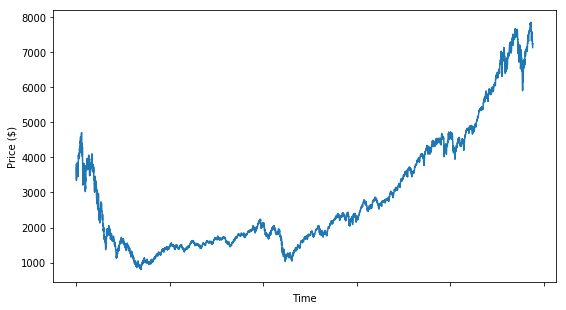

In [0]:
symbolin = 'NDX'  # SPX, DJI, NDX
data = get_data(symbolin)
data.tail(10)
data.describe()
ax = data['4. close'].plot(figsize=(9, 5))
ax.set_ylabel("Price ($)")
ax.set_xlabel("Time")
plt.show()
data_train = data['2012-01-01':'2018-01-01']
data_train = rebalance(data_train)
y = data_train.target
X = data_train.drop('target', axis=1)
X = normalize(X)
data_val = data['2018-01-01':]
y_val = data_val.target
X_val = data_val.drop('target', axis=1)
X_val = normalize(X_val)



# API DATA EXTRACTION AND PREPARATION

### API Data

In [0]:
X

,SMA,EMA,MACD_Signal,MACD_Hist,MACD,RSI,ADX,CCI,Aroon Down,Aroon Up,...,Real Lower Band,Real Middle Band,Chaikin A/D,OBV,WMA,MOM,WILLR,SlowK,SlowD,4. close
date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,-1.611602,-1.614177,-0.737994,0.504891,-0.515842,-0.262460,-1.597748,0.760145,0.402856,-1.914956,...,-1.595463,-1.611602,-1.677234,-1.498378,-1.619615,-0.250682,0.532200,0.120858,0.088106,-1.582821
2012-01-04,-1.611459,-1.609446,-0.673373,0.667406,-0.397989,-0.185283,-1.608967,0.793523,0.260194,-2.065535,...,-1.595754,-1.611459,-1.665066,-1.472565,-1.614984,-0.375885,0.906305,0.480195,0.126935,-1.575272
2012-01-05,-1.610127,-1.603442,-0.592500,0.841103,-0.260939,-0.002229,-1.588809,1.138424,0.117532,0.946039,...,-1.598776,-1.610127,-1.649598,-1.444190,-1.608648,-0.191763,1.019731,1.213098,0.655096,-1.557346
2012-01-06,-1.608462,-1.597376,-0.502048,0.943506,-0.139950,0.065193,-1.549648,1.315156,-0.025130,0.946039,...,-1.602360,-1.608462,-1.644221,-1.418183,-1.601807,-0.140209,0.912639,1.291376,1.075262,-1.550741
2012-01-09,-1.605228,-1.592340,-0.413193,0.926442,-0.062469,-0.000649,-1.512439,1.030520,-0.167792,0.946039,...,-1.604598,-1.605228,-1.646642,-1.445503,-1.595576,0.102832,0.801777,1.063765,1.284739,-1.555459
2012-01-10,-1.602944,-1.586334,-0.322052,0.950853,0.031743,0.162543,-1.446462,1.153570,-0.310454,0.946039,...,-1.608419,-1.602944,-1.653579,-1.417543,-1.588206,-0.044466,0.790107,0.845734,1.152871,-1.540363
2012-01-11,-1.599139,-1.580446,-0.232287,0.936150,0.110910,0.213824,-1.390863,0.886389,-0.453116,0.795460,...,-1.611639,-1.599139,-1.645863,-1.391280,-1.580601,0.191210,0.889299,0.767456,0.964806,-1.535645
2012-01-12,-1.593716,-1.574212,-0.143705,0.923519,0.189693,0.318167,-1.325713,0.778620,-0.595777,0.946039,...,-1.612864,-1.593716,-1.632528,-1.365483,-1.572454,0.441616,1.028857,0.988123,0.937655,-1.526210
2012-01-12,-1.593716,-1.574212,-0.143705,0.923519,0.189693,0.318167,-1.325713,0.778620,-0.595777,0.946039,...,-1.612864,-1.593716,-1.632528,-1.365483,-1.572454,0.441616,1.028857,0.988123,0.937655,-1.526210


In [0]:
X.to_csv('X.csv')

### Adding Change features in API data

In [0]:
X=pd.read_csv('X.csv')

In [0]:
X =pd.merge(X, change_feature, on='date')

In [0]:
X

,date,SMA,EMA,MACD_Signal,MACD_Hist,MACD,RSI,ADX,CCI,Aroon Down,...,4. close,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
0,2012-01-04,-1.611459,-1.609446,-0.673373,0.667406,-0.397989,-0.185283,-1.608967,0.793523,0.260194,...,-1.575272,1.40,-0.89,0.76,1.24,0.02,-1.37,0.82,0.17,-0.02
1,2012-01-05,-1.610127,-1.603442,-0.592500,0.841103,-0.260939,-0.002229,-1.588809,1.138424,0.117532,...,-1.557346,-0.84,-0.25,0.47,-0.83,0.29,-0.97,1.26,0.84,0.58
2,2012-01-06,-1.608462,-1.597376,-0.502048,0.943506,-0.139950,0.065193,-1.549648,1.315156,-0.025130,...,-1.550741,0.28,-0.62,-0.20,-1.16,-0.25,0.70,0.50,0.39,-0.27
3,2012-01-10,-1.602944,-1.586334,-0.322052,0.950853,0.031743,0.162543,-1.446462,1.153570,-0.310454,...,-1.540363,0.74,2.42,1.46,0.38,0.89,2.69,-0.08,-0.17,-0.02
4,2012-01-11,-1.599139,-1.580446,-0.232287,0.936150,0.110910,0.213824,-1.390863,0.886389,-0.453116,...,-1.535645,-0.92,-0.17,0.50,0.30,0.03,-0.42,0.55,1.02,0.02
5,2012-01-12,-1.593716,-1.574212,-0.143705,0.923519,0.189693,0.318167,-1.325713,0.778620,-0.595777,...,-1.526210,-0.87,0.44,0.49,-0.74,0.23,-0.05,-0.94,-0.11,-0.10
6,2012-01-12,-1.593716,-1.574212,-0.143705,0.923519,0.189693,0.318167,-1.325713,0.778620,-0.595777,...,-1.526210,-0.87,0.44,0.49,-0.74,0.23,-0.05,-0.94,-0.11,-0.10
7,2012-01-13,-1.587105,-1.569478,-0.066804,0.798662,0.218041,0.164829,-1.281491,0.531302,-0.738439,...,-1.535645,-0.74,-0.58,-1.03,1.36,-0.49,-1.34,1.21,0.11,0.22
8,2012-01-17,-1.579208,-1.563292,0.008517,0.781782,0.282875,0.392714,-1.186645,0.784976,-0.881101,...,-1.515831,0.30,1.82,1.52,1.05,0.36,4.18,-0.57,-0.06,-0.01
9,2012-01-18,-1.570266,-1.554701,0.094790,0.898853,0.405095,0.724212,-1.061662,0.930042,-1.023763,...,-1.484696,-0.78,0.34,0.26,0.99,1.11,-1.39,-0.96,-0.64,-0.04


In [0]:
y.head()
y.to_csv('y.csv')

In [0]:
y=pd.read_csv('y.csv')


In [0]:
y=pd.read_csv('y.csv')
y.columns = ['date', 'y']
y.head()

,date,y
0,2012-01-04,1
1,2012-01-05,1
2,2012-01-06,0
3,2012-01-09,1
4,2012-01-10,1


In [0]:
X =pd.merge(X, y, on='date')

In [0]:
X

,date,SMA,EMA,MACD_Signal,MACD_Hist,MACD,RSI,ADX,CCI,Aroon Down,...,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY,y
0,2012-01-04,-1.611459,-1.609446,-0.673373,0.667406,-0.397989,-0.185283,-1.608967,0.793523,0.260194,...,1.40,-0.89,0.76,1.24,0.02,-1.37,0.82,0.17,-0.02,1
1,2012-01-05,-1.610127,-1.603442,-0.592500,0.841103,-0.260939,-0.002229,-1.588809,1.138424,0.117532,...,-0.84,-0.25,0.47,-0.83,0.29,-0.97,1.26,0.84,0.58,1
2,2012-01-06,-1.608462,-1.597376,-0.502048,0.943506,-0.139950,0.065193,-1.549648,1.315156,-0.025130,...,0.28,-0.62,-0.20,-1.16,-0.25,0.70,0.50,0.39,-0.27,0
3,2012-01-10,-1.602944,-1.586334,-0.322052,0.950853,0.031743,0.162543,-1.446462,1.153570,-0.310454,...,0.74,2.42,1.46,0.38,0.89,2.69,-0.08,-0.17,-0.02,1
4,2012-01-11,-1.599139,-1.580446,-0.232287,0.936150,0.110910,0.213824,-1.390863,0.886389,-0.453116,...,-0.92,-0.17,0.50,0.30,0.03,-0.42,0.55,1.02,0.02,1
5,2012-01-12,-1.593716,-1.574212,-0.143705,0.923519,0.189693,0.318167,-1.325713,0.778620,-0.595777,...,-0.87,0.44,0.49,-0.74,0.23,-0.05,-0.94,-0.11,-0.10,0
6,2012-01-12,-1.593716,-1.574212,-0.143705,0.923519,0.189693,0.318167,-1.325713,0.778620,-0.595777,...,-0.87,0.44,0.49,-0.74,0.23,-0.05,-0.94,-0.11,-0.10,0
7,2012-01-12,-1.593716,-1.574212,-0.143705,0.923519,0.189693,0.318167,-1.325713,0.778620,-0.595777,...,-0.87,0.44,0.49,-0.74,0.23,-0.05,-0.94,-0.11,-0.10,0
8,2012-01-12,-1.593716,-1.574212,-0.143705,0.923519,0.189693,0.318167,-1.325713,0.778620,-0.595777,...,-0.87,0.44,0.49,-0.74,0.23,-0.05,-0.94,-0.11,-0.10,0
9,2012-01-13,-1.587105,-1.569478,-0.066804,0.798662,0.218041,0.164829,-1.281491,0.531302,-0.738439,...,-0.74,-0.58,-1.03,1.36,-0.49,-1.34,1.21,0.11,0.22,1


### Dataset analysis

In [0]:
X [X .isnull().any(axis=1)].head()

,date,SMA,EMA,MACD_Signal,MACD_Hist,MACD,RSI,ADX,CCI,Aroon Down,...,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY,y


In [0]:
import numpy as np
np.sum(X
       .isnull().any(axis=1))

0

In [0]:
X .isnull().any(axis=0)

date                False
SMA                 False
EMA                 False
MACD_Signal         False
MACD_Hist           False
MACD                False
RSI                 False
ADX                 False
CCI                 False
Aroon Down          False
Aroon Up            False
Real Upper Band     False
Real Lower Band     False
Real Middle Band    False
Chaikin A/D         False
OBV                 False
WMA                 False
MOM                 False
WILLR               False
SlowK               False
SlowD               False
4. close            False
Change_oil          False
Change_DAX          False
Change_gold         False
Change_Nikkei       False
Change_SP           False
Change_Shanghai     False
Change_USD_EUR      False
Change_USD_GBP      False
Change_USD_JPY      False
y                   False
dtype: bool

In [0]:
X .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 0 to 2282
Data columns (total 32 columns):
date                2283 non-null object
SMA                 2283 non-null float64
EMA                 2283 non-null float64
MACD_Signal         2283 non-null float64
MACD_Hist           2283 non-null float64
MACD                2283 non-null float64
RSI                 2283 non-null float64
ADX                 2283 non-null float64
CCI                 2283 non-null float64
Aroon Down          2283 non-null float64
Aroon Up            2283 non-null float64
Real Upper Band     2283 non-null float64
Real Lower Band     2283 non-null float64
Real Middle Band    2283 non-null float64
Chaikin A/D         2283 non-null float64
OBV                 2283 non-null float64
WMA                 2283 non-null float64
MOM                 2283 non-null float64
WILLR               2283 non-null float64
SlowK               2283 non-null float64
SlowD               2283 non-null float64
4. close    

In [0]:
class_y=X.y
labels_X=X.drop(columns=['y','date'])

# MODEL BUILDING AND ANALYSIS

## SUPPORT VECTOR MACHINE MODEL

### SVM Support Vector Machine

In [0]:
from sklearn.svm import LinearSVC
y=y
X_train, X_test, y_train, y_test = train_test_split(labels_X, class_y, test_size=0.10, shuffle=True, random_state=2000)

svc=SVC(gamma="auto",random_state=5)
svc= svc.fit(X_train , y_train)
svc

C:\Users\HP\Anaconda33\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=5,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred1 = svc.predict(X_test)
print('Accuracy score= {:.2f}'.format(svc.score(X_test, y_test)*100))

Accuracy score= 0.74


### Precision, Recall, F1

In [0]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.75      0.92      0.83       153
           1       0.70      0.39      0.50        76

   micro avg       0.74      0.74      0.74       229
   macro avg       0.73      0.65      0.67       229
weighted avg       0.73      0.74      0.72       229





### ROC CURVE

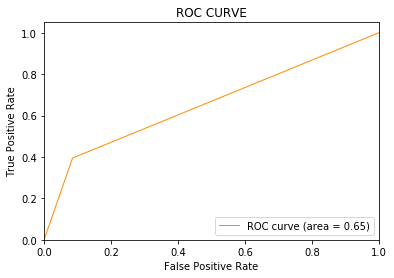

In [0]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

roc_auc = auc(fpr, tpr)


plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')

plt.legend(loc="lower right")

plt.show()


## RANDOM FOREST MODEL

### Random Forest

In [0]:
Ran_For= RandomForestClassifier(n_estimators=1000,max_depth=30, random_state=100,max_leaf_nodes=1000)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=1000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [0]:
y_pred2 = Ran_For.predict(X_test)
print('Accuracy score= {:.2f}'.format(Ran_For.score(X_test, y_test)*100))

Accuracy score= 0.84


### Precision, Recall, F1

In [0]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred2)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.89      0.86      0.88       153
           1       0.74      0.79      0.76        76

   micro avg       0.84      0.84      0.84       229
   macro avg       0.82      0.83      0.82       229
weighted avg       0.84      0.84      0.84       229





### ROC CURVE

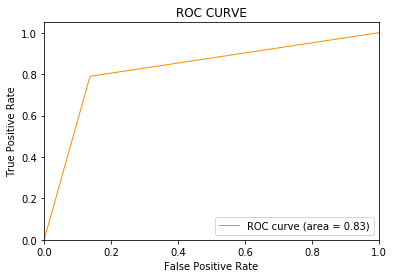

In [0]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

roc_auc = auc(fpr, tpr)


plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')

plt.legend(loc="lower right")

plt.show()


## COMPARISION OF SVM AND RANDOM FOREST MODELS

### Comparison of Results

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Deatiled Performance of the all models")
x.field_names = ["Model", "Accuracy"]

x.add_row(["SVM", 0.74])
x.add_row(["RandomForestClassifier",0.84])
print(x)
print('\n')



Deatiled Performance of the all models
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|          SVM           |   0.74   |
| RandomForestClassifier |   0.84   |
+------------------------+----------+




In [0]:
x = PrettyTable()
print('\n')
print("Best Model.")
x.field_names = ["Model", "Accuracy"]
x.add_row(["RandomForestClassifier",0.84])
print(x)
print('\n')



Best Model.
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
| RandomForestClassifier |   0.84   |
+------------------------+----------+




### Best Accuracy of Random Forest Algorithm is 84%

# RECURSSIVE FEATURE SELECTION

## IMPORTING DEPENDENCIES

In [0]:
import pandas as pd
from sklearn.metrics import accuracy_score as AS
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score as RAS
from sklearn.metrics import f1_score as f1
from sklearn.model_selection import train_test_split as TTS
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

## RANDOM FOREST MODEL

### DATA PRE-PROCESSING

In [0]:
X_train, X_test, y_train, y_test = TTS(labels_X, class_y, test_size=0.10, shuffle=True, random_state=2000)

### EXTRACTING BEST FEATURES FROM DATASET

In [0]:
rfe=RFE(estimator=RFC(n_estimators=1000,max_depth=30, random_state=100,max_leaf_nodes=1000),step=2)

rfe=rfe.fit(X_train,y_train)

In [0]:
sel_features=pd.DataFrame({"Feature Name":list(X_train.columns),"Rank of feature":rfe.ranking_})
sel_features

,Feature Name,Rank of feature
0,SMA,8
1,EMA,7
2,MACD_Signal,1
3,MACD_Hist,1
4,MACD,1
5,RSI,5
6,ADX,1
7,CCI,1
8,Aroon Down,9
9,Aroon Up,9


In [0]:
rank1Features=list(sel_features[sel_features["Rank of feature"]==1]["Feature Name"])
rank1Features

['MACD_Signal',
 'MACD_Hist',
 'MACD',
 'ADX',
 'CCI',
 'Real Upper Band',
 'OBV',
 'SlowK',
 'Change_oil',
 'Change_DAX',
 'Change_gold',
 'Change_Nikkei',
 'Change_SP',
 'Change_Shanghai',
 'Change_USD_GBP']

### RANDOM FOREST MODEL TESTING AGAINST BEST FEATURES SELECTED

In [0]:
X=labels_X[rank1Features]
X_train, X_test, y_train, y_test = TTS(X,class_y, test_size=0.10, shuffle=True, random_state=2000)

In [0]:
Model=RFC(n_estimators=1000,max_depth=30, random_state=100,max_leaf_nodes=1000)

Model.fit(X_train,y_train)
prediction=Model.predict(X_test)

In [0]:
print("ACCURACY is : {:.2f}".format(AS(y_test,prediction)*100))

ACCURACY is : 85.59


### Precision, Recall, F1

In [0]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, prediction)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.92      0.86      0.89       153
           1       0.75      0.84      0.80        76

   micro avg       0.86      0.86      0.86       229
   macro avg       0.83      0.85      0.84       229
weighted avg       0.86      0.86      0.86       229





### ROC CURVE

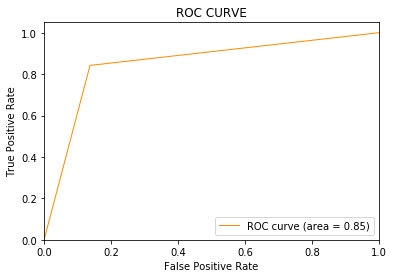

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)

roc_auc = auc(fpr, tpr)


plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')

plt.legend(loc="lower right")

plt.show()


## SVM MODEL

### DATA PRE-PROCESSING

In [0]:
X_train, X_test, y_train, y_test = TTS(labels_X,class_y, test_size=0.10, shuffle=True, random_state=2000)

### EXTRACTING BEST FEATURES FROM DATASET

In [0]:
rfe=RFE(estimator=SVC(kernel="linear",gamma="auto",random_state=5),step=5)

rfe=rfe.fit(X_train,y_train)

In [0]:
sel_features=pd.DataFrame({"Feature Name":list(X_train.columns),"Rank of feature":rfe.ranking_})
sel_features

,Feature Name,Rank of feature
0,SMA,1
1,EMA,1
2,MACD_Signal,1
3,MACD_Hist,1
4,MACD,4
5,RSI,1
6,ADX,4
7,CCI,2
8,Aroon Down,3
9,Aroon Up,2


In [0]:
rank1Features=list(sel_features[sel_features["Rank of feature"]<10]["Feature Name"])
rank1Features

['SMA',
 'EMA',
 'MACD_Signal',
 'MACD_Hist',
 'MACD',
 'RSI',
 'ADX',
 'CCI',
 'Aroon Down',
 'Aroon Up',
 'Real Upper Band',
 'Real Lower Band',
 'Real Middle Band',
 'Chaikin A/D',
 'OBV',
 'WMA',
 'MOM',
 'WILLR',
 'SlowK',
 'SlowD',
 '4. close',
 'Change_oil',
 'Change_DAX',
 'Change_gold',
 'Change_Nikkei',
 'Change_SP',
 'Change_Shanghai',
 'Change_USD_EUR',
 'Change_USD_GBP',
 'Change_USD_JPY']

### SVM MODEL TESTING AGAINST BEST FEATURES SELECTED

In [0]:
X=labels_X[rank1Features]
X_train, X_test, y_train, y_test = TTS(X, class_y, test_size=0.10, shuffle=True, random_state=2000)

In [0]:
Model=SVC(gamma="auto",random_state=5)

Model.fit(X_train,y_train)
prediction=Model.predict(X_test)

In [0]:
print("ACCURACY is : {:.2f}".format(AS(y_test,prediction)*100))

ACCURACY is : 74.24


### Precision, Recall, F1

In [0]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, prediction)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.75      0.92      0.83       153
           1       0.70      0.39      0.50        76

   micro avg       0.74      0.74      0.74       229
   macro avg       0.73      0.65      0.67       229
weighted avg       0.73      0.74      0.72       229





### ROC CURVE

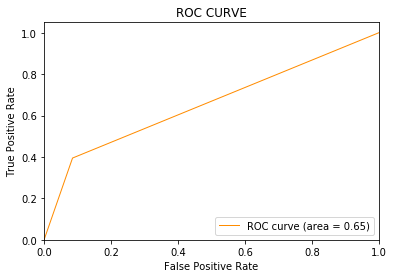

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)

roc_auc = auc(fpr, tpr)


plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')

plt.legend(loc="lower right")

plt.show()


## COMPARISION OF SVM AND RANDOM FOREST MODELS

### Comparison of Results

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Deatiled Performance of the all models")
x.field_names = ["Model", "Accuracy"]

x.add_row(["SVM", 74.24])
x.add_row(["RandomForestClassifier",85.59])
print(x)
print('\n')



Deatiled Performance of the all models
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|          SVM           |  74.24   |
| RandomForestClassifier |  85.59   |
+------------------------+----------+




In [0]:
x = PrettyTable()
print('\n')
print("Best Model.")
x.field_names = ["Model", "Accuracy"]
x.add_row(["RandomForestClassifier",85.59])
print(x)
print('\n')



Best Model.
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
| RandomForestClassifier |  85.59   |
+------------------------+----------+




## Accuracy of Random Forest Algorithm after FEATURE SELECTION is 85.59%

# TRAINING OF ALL DATA

### Now training all data (training&testing) on Random Forest Algorithm

In [0]:
class_y=X.y
labels_X=X.drop(columns=['y','date'])

### Random Forest

In [0]:
Ran_For= RandomForestClassifier(n_estimators=1000,max_depth=30, random_state=100,max_leaf_nodes=1000)
Ran_For= Ran_For.fit(labels_X , class_y)
Ran_For

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=1000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

### By Entring the Labels of target 1

In [0]:
data_for_prediction=pd.read_csv('prediction.csv')

In [0]:
data_for_prediction

,-1.611458897,-1.609445666,-0.673372637,0.667405683,-0.397989086,-0.185283271,-1.60896729,0.79352331,0.260193853,-2.065534681,...,-1.575272426,1.4,-0.89,0.76,1.24,0.02,-1.37,0.82,0.17,-0.02
0,-1.611459,-1.609446,-0.673373,0.667406,-0.397989,-0.185283,-1.608967,0.793523,0.260194,-2.065535,...,-1.575272,1.4,-0.89,0.76,1.24,0.02,-1.37,0.82,0.17,-0.02


### Prediction by using trained model

In [0]:
aa=Ran_For.predict(data_for_prediction)
if aa==1:
    print("stock prediction is 1")
else:
    print("stock prediction is 0")

stock prediction is 1
